## CREDIT EDA PROJECT

Importing Libraries

In [89]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Load the Dataset

In [90]:
df = pd.read_csv("creditdetails.csv") 
df.rename(columns={'default.payment.next.month': 'default'}, inplace=True)

In [91]:
nt_to_usd = 0.031

# NT$ columns to convert and then drop
nt_columns = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
              'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
              'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Create new USD columns and drop original NT$ ones
for col in nt_columns:
    df[col + '_USD'] = (df[col] * nt_to_usd).round(2)

df.drop(columns=nt_columns, inplace=True)

# Displaying sample of updated credit limit in USD
df[['LIMIT_BAL_USD']].head()



,LIMIT_BAL_USD
0,620.0
1,3720.0
2,2790.0
3,1550.0
4,1550.0


In [92]:
df.head()

,ID,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3_USD,BILL_AMT4_USD,BILL_AMT5_USD,BILL_AMT6_USD,PAY_AMT1_USD,PAY_AMT2_USD,PAY_AMT3_USD,PAY_AMT4_USD,PAY_AMT5_USD,PAY_AMT6_USD
0,1,2,2,1,24,2,2,-1,-1,-2,...,21.36,0.00,0.00,0.00,0.00,21.36,0.0,0.0,0.00,0.00
1,2,2,2,2,26,-1,2,0,0,0,...,83.14,101.43,107.10,101.09,0.00,31.00,31.0,31.0,0.00,62.00
2,3,2,2,2,34,0,0,0,0,0,...,420.33,444.26,463.39,482.02,47.06,46.50,31.0,31.0,31.00,155.00
3,4,2,2,1,37,0,0,0,0,0,...,1528.02,877.73,897.73,915.96,62.00,62.59,37.2,34.1,33.14,31.00
4,5,1,2,1,57,-1,0,-1,0,0,...,1110.88,649.14,593.53,593.06,62.00,1137.11,310.0,279.0,21.36,21.05


###### NOTE: All NT$ monetary values converted to USD using 1 NT$ ≈ 0.031 USD

Data Inspection

In [93]:
print("Shape of the dataset:", df.shape)
print("\nInfo: ")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

print("\nUnique values:\n")
print(df.isnull().sum())

#Summary stats
df.describe()

Shape of the dataset: (30000, 25)

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             30000 non-null  int64  
 1   SEX            30000 non-null  int64  
 2   EDUCATION      30000 non-null  int64  
 3   MARRIAGE       30000 non-null  int64  
 4   AGE            30000 non-null  int64  
 5   PAY_0          30000 non-null  int64  
 6   PAY_2          30000 non-null  int64  
 7   PAY_3          30000 non-null  int64  
 8   PAY_4          30000 non-null  int64  
 9   PAY_5          30000 non-null  int64  
 10  PAY_6          30000 non-null  int64  
 11  default        30000 non-null  int64  
 12  LIMIT_BAL_USD  30000 non-null  float64
 13  BILL_AMT1_USD  30000 non-null  float64
 14  BILL_AMT2_USD  30000 non-null  float64
 15  BILL_AMT3_USD  30000 non-null  float64
 16  BILL_AMT4_USD  30000 non-null  float64
 17  BILL_AMT

,ID,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3_USD,BILL_AMT4_USD,BILL_AMT5_USD,BILL_AMT6_USD,PAY_AMT1_USD,PAY_AMT2_USD,PAY_AMT3_USD,PAY_AMT4_USD,PAY_AMT5_USD,PAY_AMT6_USD
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,1457.407843,1341.151447,1249.653469,1205.024609,175.571035,183.556114,161.996147,149.608411,148.781053,161.680591
std,8660.398374,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,2149.830996,1994.318513,1884.711793,1846.177340,513.461677,714.266975,545.815795,485.650964,473.627473,551.101424
min,1.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-4875.180000,-5270.000000,-2521.350000,-10527.690000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,82.655000,72.132500,54.650000,38.940000,31.000000,25.820000,12.090000,9.180000,7.825000,3.652500
50%,15000.500000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,622.745000,590.610000,561.240000,529.200000,65.100000,62.280000,55.800000,46.500000,46.500000,46.500000
75%,22500.250000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1865.105000,1689.682500,1555.910000,1525.150000,155.190000,155.000000,139.660000,124.407500,124.975000,124.000000
max,30000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,51586.760000,27639.170000,28742.300000,29811.580000,27080.110000,52212.030000,27777.240000,19251.000000,13222.400000,16388.650000


In [94]:
# View percentage of missing values for all columns
missing_percent_all = df.isnull().mean() * 100
missing_percent_all.sort_values(ascending=False)

ID               0.0
SEX              0.0
EDUCATION        0.0
MARRIAGE         0.0
AGE              0.0
PAY_0            0.0
PAY_2            0.0
PAY_3            0.0
PAY_4            0.0
PAY_5            0.0
PAY_6            0.0
default          0.0
LIMIT_BAL_USD    0.0
BILL_AMT1_USD    0.0
BILL_AMT2_USD    0.0
BILL_AMT3_USD    0.0
BILL_AMT4_USD    0.0
BILL_AMT5_USD    0.0
BILL_AMT6_USD    0.0
PAY_AMT1_USD     0.0
PAY_AMT2_USD     0.0
PAY_AMT3_USD     0.0
PAY_AMT4_USD     0.0
PAY_AMT5_USD     0.0
PAY_AMT6_USD     0.0
dtype: float64

###### Conclusion: There are no missing values in the dataset, so no imputation or null handling is required.

Binning of Continuous Variables

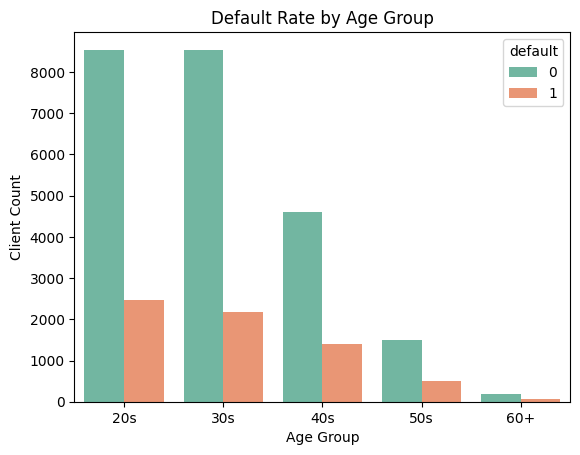

In [95]:
#Binning AGE into categories
df['AGE_bin'] = pd.cut(df['AGE'], bins=[20, 30, 40, 50, 60, 100], labels=['20s', '30s', '40s', '50s', '60+'])
#View the distribution of clients by age group
sns.countplot(data=df, x='AGE_bin', hue='default', palette='Set2')
plt.title("Default Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Client Count")
plt.show()

###### Conclusion from Age Binning Chart: Most credit card clients are in their 20s and 30s, and these groups also show the highest number of defaults. However, as age increases, both the number of clients and the default rate decrease significantly. Clients aged 40 and above are less likely to default.

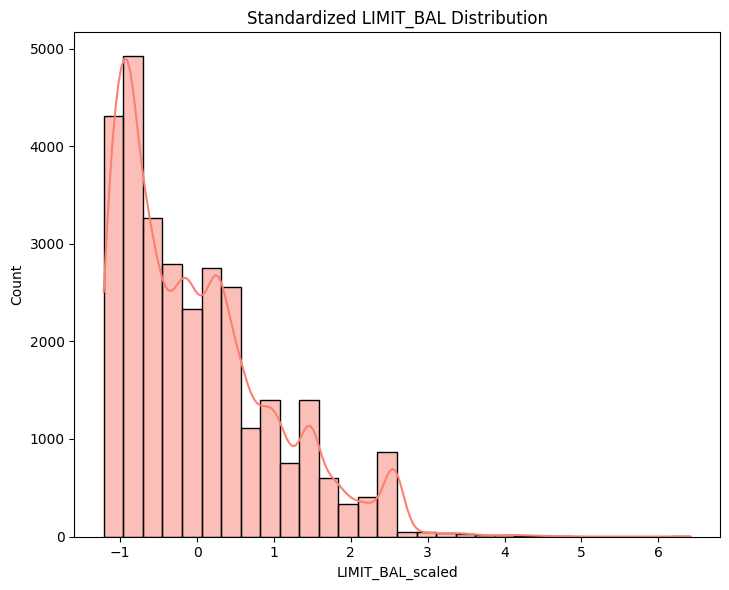

In [96]:
#Standardization of LIMIT_BAL
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['LIMIT_BAL_scaled'] = scaler.fit_transform(df[['LIMIT_BAL_USD']])

plt.figure(figsize=(14, 6))

# Plot
plt.subplot(1, 2, 2)
sns.histplot(df['LIMIT_BAL_scaled'], bins=30, kde=True, color='salmon')
plt.title('Standardized LIMIT_BAL Distribution')
plt.xlabel('LIMIT_BAL_scaled')

plt.tight_layout()
plt.show()

Data Imbalance Check

Default Value Counts:
 default
0    23364
1     6636
Name: count, dtype: int64


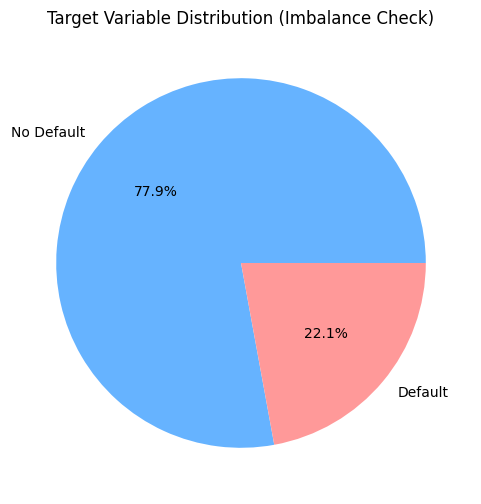

In [97]:
default_counts = df['default'].value_counts()
print("Default Value Counts:\n", default_counts)

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(default_counts, labels=['No Default', 'Default'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title("Target Variable Distribution (Imbalance Check)")
plt.show()

###### Conclusion : The dataset is imbalanced, with 77.9% of clients not defaulting and only 22.1% defaulting on their credit card payments.

### Univariate Analysis

Analyzing a mix of:

-> Categorical features (SEX, EDUCATION, MARRIAGE)

-> Continuous features (LIMIT_BAL, AGE, PAY_0, BILL_AMT1)

#### A. Categorical Features

1. Gender(SEX)

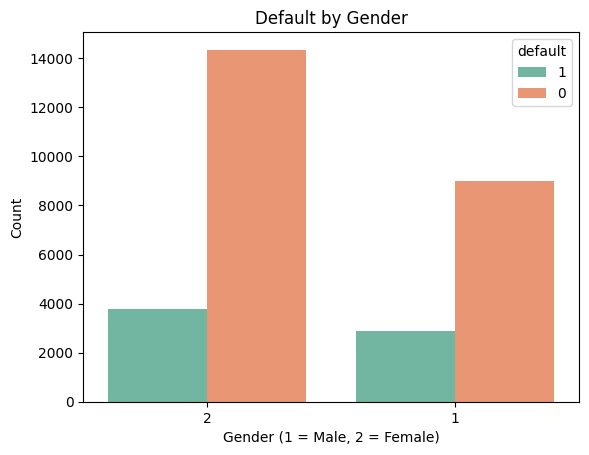

In [98]:
df['SEX']=df['SEX'].astype(str)
df['default']=df['default'].astype(str)
sns.countplot(data=df, x='SEX', hue='default', palette='Set2')
plt.title('Default by Gender')
plt.xlabel('Gender (1 = Male, 2 = Female)')
plt.ylabel('Count')
plt.show()

###### Conclusion : Females (2) form a larger portion of both total clients and defaults, but default rates appear comparable across genders.

2. Education 

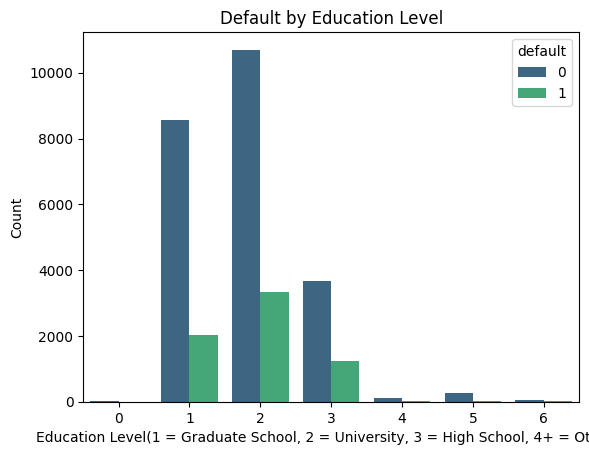

In [99]:
sns.countplot(data=df, x='EDUCATION', hue='default', palette='viridis')
plt.title('Default by Education Level')
plt.xlabel('Education Level(1 = Graduate School, 2 = University, 3 = High School, 4+ = Others)')
plt.ylabel('Count')
plt.show()

###### Conclusion : Most defaults are from university (2) and graduate school (1) clients, primarily due to their higher representation — default rates appear fairly consistent across education levels.

3. Marriage

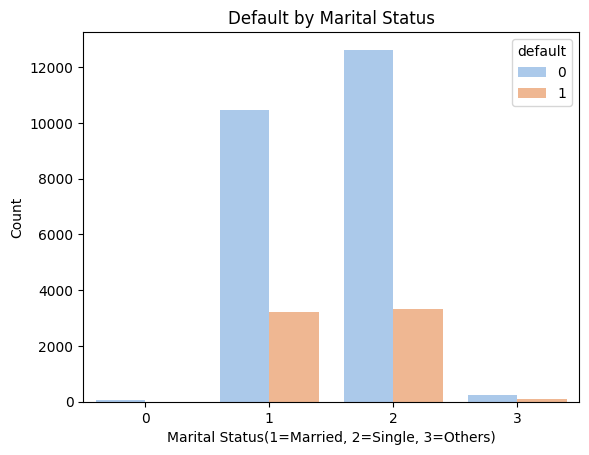

In [100]:
sns.countplot(data=df, x='MARRIAGE', hue='default', palette='pastel')
plt.title('Default by Marital Status')
plt.xlabel('Marital Status(1=Married, 2=Single, 3=Others)')
plt.ylabel('Count')
plt.show()

###### Conclusion : Both single (2) and married (1) clients show similar default patterns, suggesting marital status has limited impact on default likelihood.

#### B. Continuous Features

1. Credit Limit

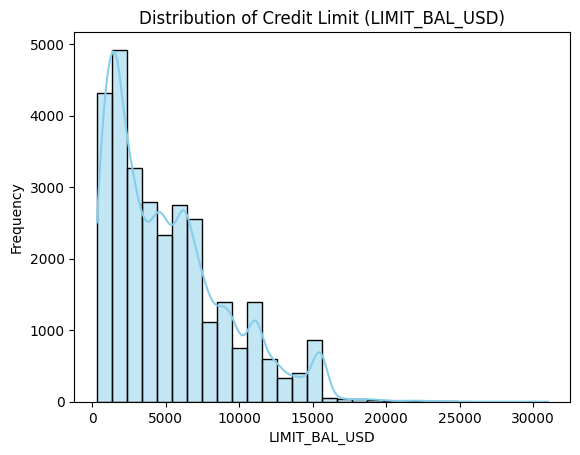

In [101]:
sns.histplot(data=df, x='LIMIT_BAL_USD', kde=True, bins=30, color='skyblue')
plt.title('Distribution of Credit Limit (LIMIT_BAL_USD)')
plt.xlabel('LIMIT_BAL_USD')
plt.ylabel('Frequency')
plt.show()

###### Conclusion : Credit limits are right-skewed, with most clients having limits below $10,000, and very few having high limits.

2. Age

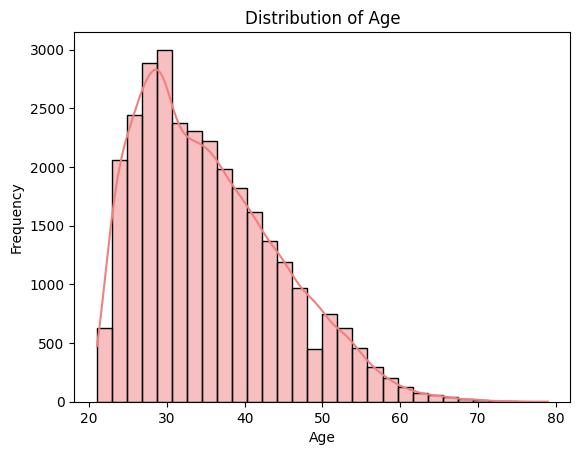

In [102]:
sns.histplot(data=df, x='AGE', kde=True, bins=30, color='lightcoral')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

###### Conclusion : Most credit card holders are between 25 and 40 years old, with frequency decreasing steadily beyond that.

3. Past Payment Status

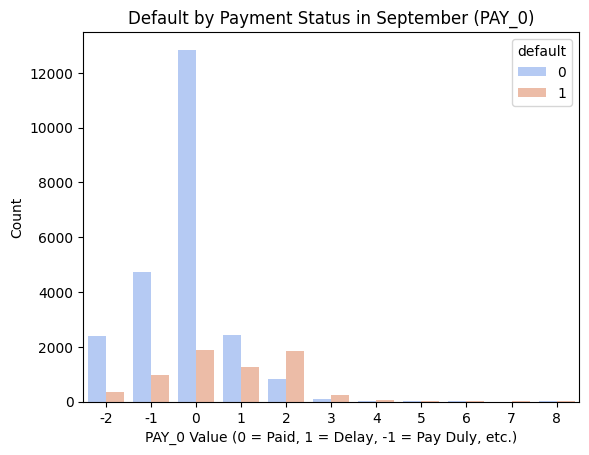

In [103]:
sns.countplot(data=df, x='PAY_0', hue='default', palette='coolwarm')
plt.title('Default by Payment Status in September (PAY_0)')
plt.xlabel('PAY_0 Value (0 = Paid, 1 = Delay, -1 = Pay Duly, etc.)')
plt.ylabel('Count')
plt.show()

###### Conclusion : Customers with delayed or missed payments in September (PAY_0 ≥ 1) show a higher likelihood of defaulting.

## Bivariate Analysis

1. Default Rate by Education Level

In [104]:
df['default'] = df['default'].astype(int)

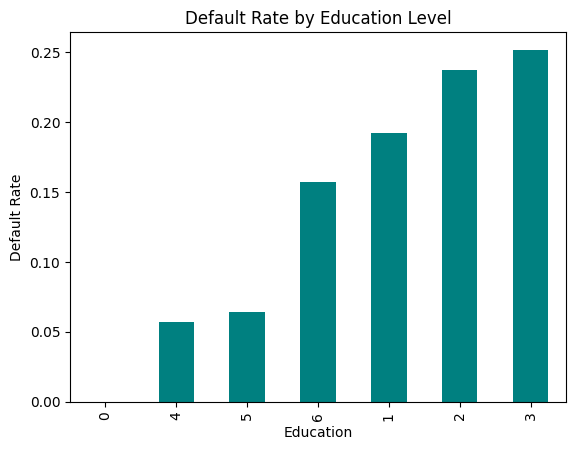

In [105]:
edu_default = df.groupby('EDUCATION')['default'].mean().sort_values()
edu_default.plot(kind='bar', color='teal')
plt.title("Default Rate by Education Level")
plt.ylabel("Default Rate")
plt.xlabel("Education")
plt.show()

###### Customers with lower education levels (especially High School and University) tend to have higher default rates, whereas graduate degree holders and others show significantly lower risk of default.

2. Default Rate by Marital Status

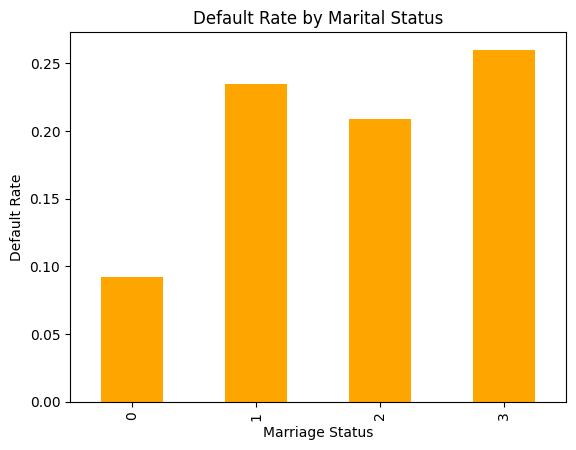

In [106]:
marriage_default = df.groupby('MARRIAGE')['default'].mean()
marriage_default.plot(kind='bar', color='orange')
plt.title("Default Rate by Marital Status")
plt.ylabel("Default Rate")
plt.xlabel("Marriage Status")
plt.show()

###### Conclusion : The default rate varies by marital status, with category 3 having the highest default rate and category 0 the lowest.

3. Default Rate by Age Group

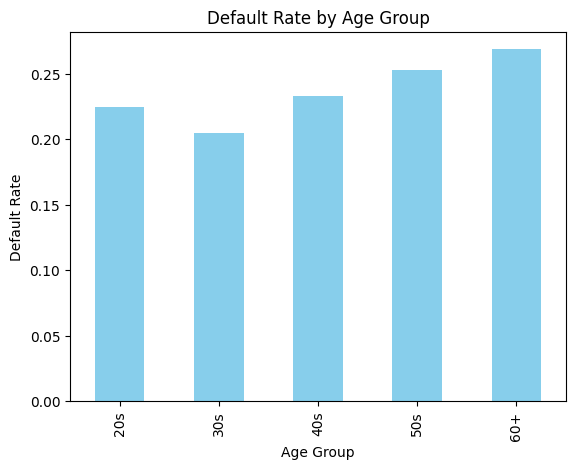

In [107]:
age_bin_default = df.groupby('AGE_bin')['default'].mean()
age_bin_default.plot(kind='bar', color='skyblue')
plt.title("Default Rate by Age Group")
plt.ylabel("Default Rate")
plt.xlabel("Age Group")
plt.show()

###### Conclusion : The default rate increases with age, with the 60+ age group having the highest rate and the 30s having the lowest.

4. Credit Limit Distribution by Default Status

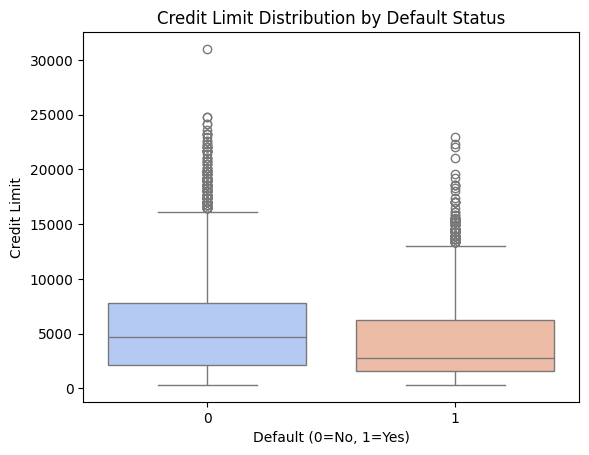

In [109]:
sns.boxplot(data=df, x='default', y='LIMIT_BAL_USD', palette='coolwarm')
plt.title('Credit Limit Distribution by Default Status')
plt.xlabel('Default (0=No, 1=Yes)')
plt.ylabel('Credit Limit')
plt.show()

###### Conclusion : Defaulters tend to have lower credit limits compared to non-defaulters, as shown by the lower median and interquartile range.

## Multivariate Analysis

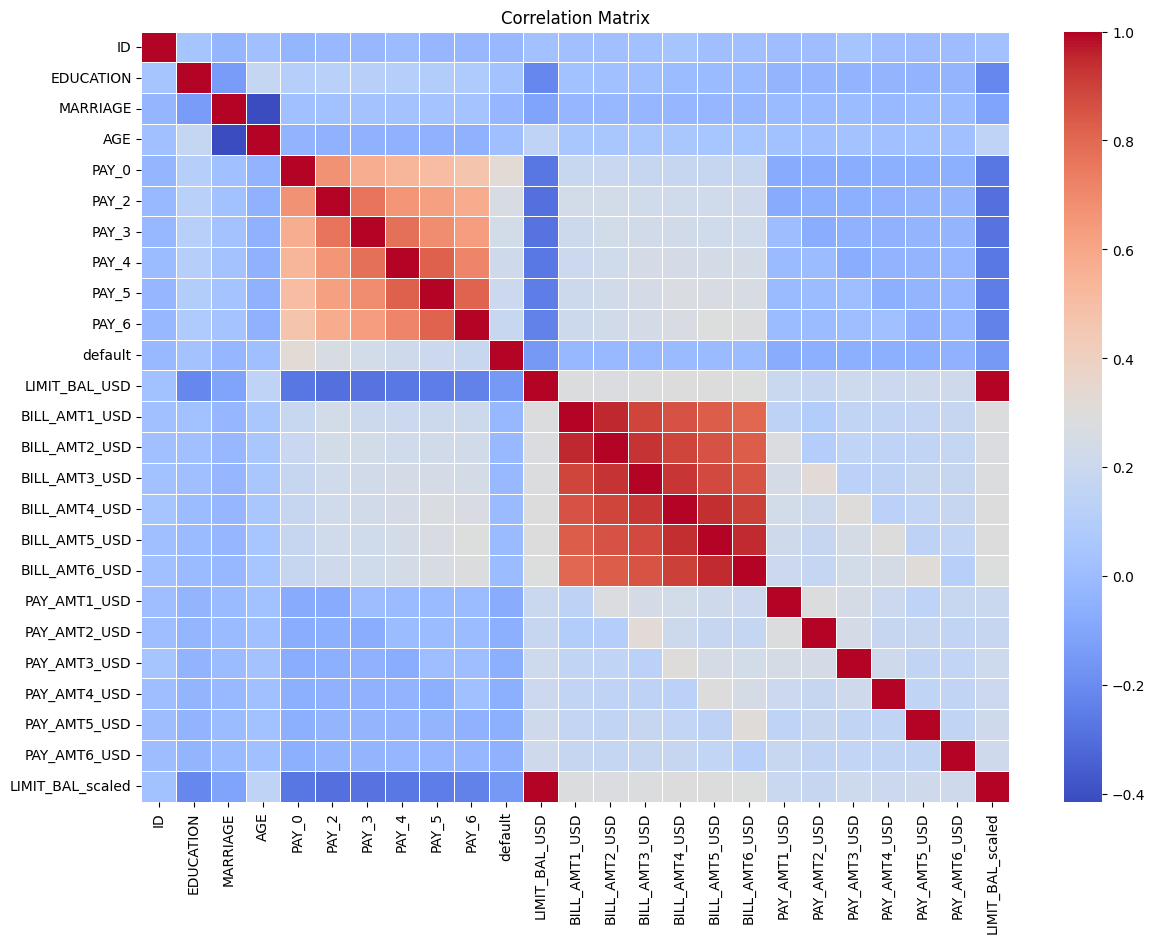

In [116]:
plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

###### Conclusion : The correlation matrix shows that default status is most positively correlated with recent payment delays (PAY_0 to PAY_6) and weakly negatively correlated with credit limit and bill amounts, indicating that delayed payments are the strongest predictors of default.

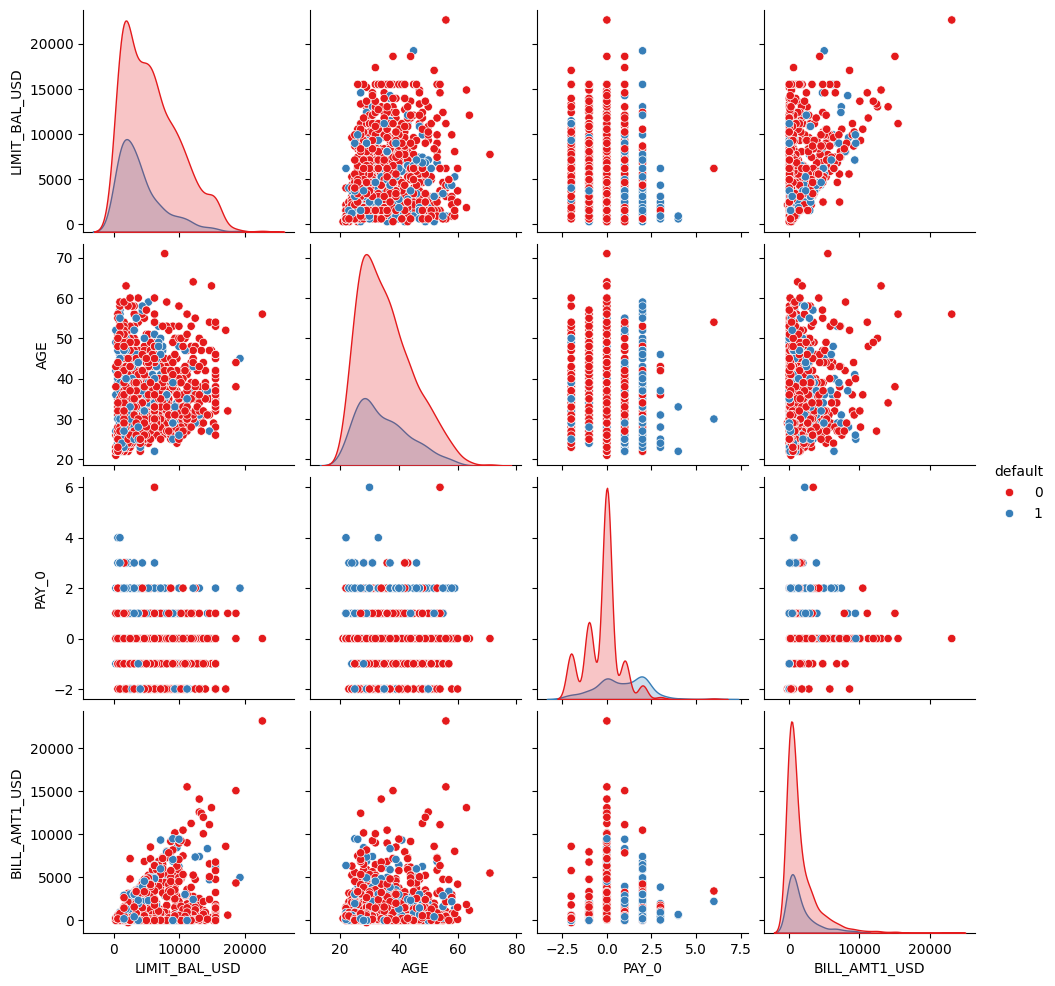

In [114]:
sample_df = df.sample(1000, random_state=1)
sns.pairplot(sample_df[['LIMIT_BAL_USD', 'AGE', 'PAY_0', 'BILL_AMT1_USD', 'default']], hue='default', palette='Set1')
plt.show()

###### Conclusion : Defaulters tend to have lower credit limits and higher delayed payments (PAY_0), with subtle age differences.